## Project Task 1: Dashboard

In [3]:
import datetime as dt
from pathlib import Path
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


#### Airline Safety Data from https://github.com/fivethirtyeight/data/tree/master/airline-safety

In [4]:
airlines_safety = pd.read_csv('ArchiveData/CSV/airline-safety.csv')

In [5]:
airlines_safety['avail_seat_Total_in_trillions'] = airlines_safety['avail_seat_km_per_week'].apply(lambda x: (x*30*52)/10e11)
airlines_safety['Total_incidents'] = airlines_safety['incidents_85_99'] + airlines_safety['incidents_00_14']
airlines_safety['Total_fatalities'] = airlines_safety['fatalities_85_99'] + airlines_safety['fatalities_00_14']
airlines_safety['fatalities_per_trillion'] = airlines_safety['Total_fatalities']//airlines_safety['avail_seat_Total_in_trillions']
airlines_safety['incidents_per_trillion'] = airlines_safety['Total_incidents']//airlines_safety['avail_seat_Total_in_trillions']

In [6]:
airlines_safety.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,avail_seat_Total_in_trillions,Total_incidents,Total_fatalities,fatalities_per_trillion,incidents_per_trillion
0,Aer Lingus,320906734,2,0,0,0,0,0,0.500615,2,0,0.0,3.0
1,Aeroflot*,1197672318,76,14,128,6,1,88,1.868369,82,216,115.0,43.0
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,0.601854,7,0,0.0,11.0
3,Aeromexico*,596871813,3,1,64,5,0,0,0.931120,8,64,68.0,8.0
4,Air Canada,1865253802,2,0,0,2,0,0,2.909796,4,0,0.0,1.0


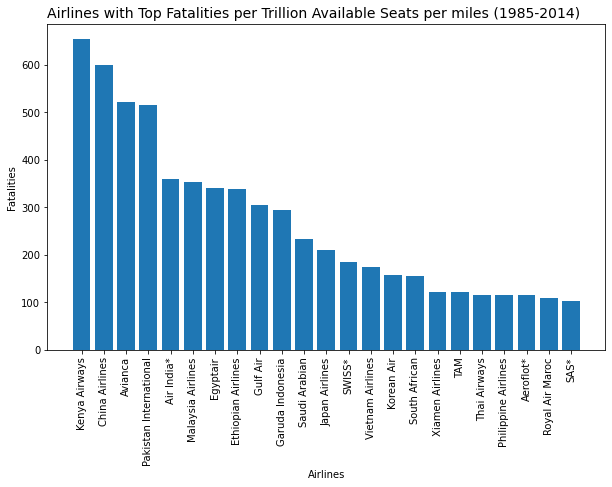

In [7]:
plt.rcParams['figure.figsize'] = [10,6]
df2 = airlines_safety[airlines_safety['fatalities_per_trillion'] >99].sort_values('fatalities_per_trillion', ascending=False)

ax = plt.bar(df2['airline'],df2['fatalities_per_trillion'])

plt.title("Airlines with Top Fatalities per Trillion Available Seats per miles (1985-2014)",fontsize = 14, loc='left')
plt.xlabel("Airlines")
plt.ylabel("Fatalities")
plt.xticks(rotation=90, ha='center')

plt.show()

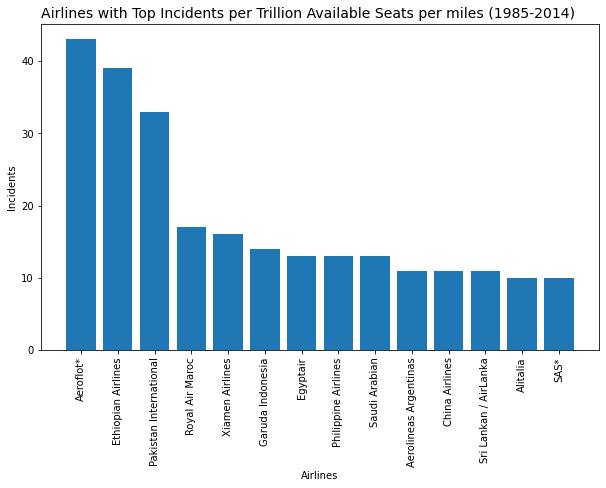

In [8]:
plt.rcParams['figure.figsize'] = [10,6]
df2 = airlines_safety[airlines_safety['incidents_per_trillion']>9].sort_values('incidents_per_trillion', ascending=False)

ax = plt.bar(df2['airline'],df2['incidents_per_trillion'])

plt.title("Airlines with Top Incidents per Trillion Available Seats per miles (1985-2014)",fontsize = 14, loc='left')
plt.xlabel("Airlines")
plt.ylabel("Incidents")
plt.xticks(rotation=90, ha='center')

plt.show()

In [9]:
countries = pd.read_csv('ArchiveData/CSV/airlines.csv')
countries.head(2)

,airline,Country
0,Aer Lingus,Ireland
1,Aeroflot*,Russia


In [10]:
airlines = pd.merge(airlines_safety, countries, how="left", on=["airline"])

In [11]:
airlines.to_csv('Airlines/airlines_safety1.csv') 

#### Accidents Data 

In [81]:
accidents = pd.read_csv('ArchiveData/CSV/Accidents and fatalities per year.csv')
accidents = accidents.drop(['Unnamed: 9', 'Unnamed: 10'], axis = 1)
accidents.head()

,Year,Accidents_w0_Suicid_sabotage_hijack,Fatalities_w0_Suicid_sabotage_hijack,Total_Aircraft_Accidents,Total_Aircraft_Fatalities,Total_Aircraft_passenger_Accidents,Aircraft_Passenger_Fatalities,Accidents_w_Cargo_Pasengers,Fatalities_w_Cargo_Pasengers,World air traffic (departures),1 accident \nper x flights,fatal accidents \nper mln flights,5-year \nmoving avg,Year2,Corporate_jets_Accidents,Corporate_jets_Fatalities,moving 5 year average # of accidents
0,1946,73,842,73,842,53,755,60,770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947,82,1083,84,1093,54,988,73,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1948,99,1303,100,1328,63,1175,80,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1949,81,1109,84,1155,61,1076,72,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950,71,1124,71,1124,46,1036,56,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


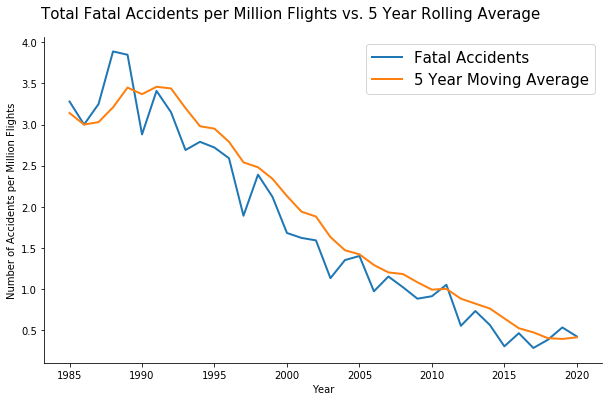

In [82]:
fig, ax = plt.subplots(figsize = (10,6))
fig.suptitle('Total Fatal Accidents per Million Flights vs. 5 Year Rolling Average',
             x=0.12, y=.95, horizontalalignment='left', verticalalignment='top', fontsize=15)
df = accidents[accidents['Year']>1984]

plot1 = sns.lineplot(data=df, x="Year", y='fatal accidents \nper mln flights', linewidth=2, label = 'Fatal Accidents')
plot2 = sns.lineplot(data=df, x="Year", y='5-year \nmoving avg', linewidth=2, label = '5 Year Moving Average')

ax.set_xlabel("Year")
ax.set_ylabel("Number of Accidents per Million Flights")
sns.despine()
plt.legend(prop={'size':15}, loc='upper right')
#fig.legend(handles, labels, loc=(0.63,0.8))
plt.show()


In [83]:
accidents['fatalities \nper mln flights'] = accidents['Fatalities_w_Cargo_Pasengers']/accidents['World air traffic (departures)']
accidents['fatalities \nper mln flights'] = accidents['fatalities \nper mln flights'].apply(lambda x: (x*10e5))

In [84]:
accidents['5-year \nmoving avg fatalities'] = accidents['fatalities \nper mln flights'].rolling(window=5).mean()

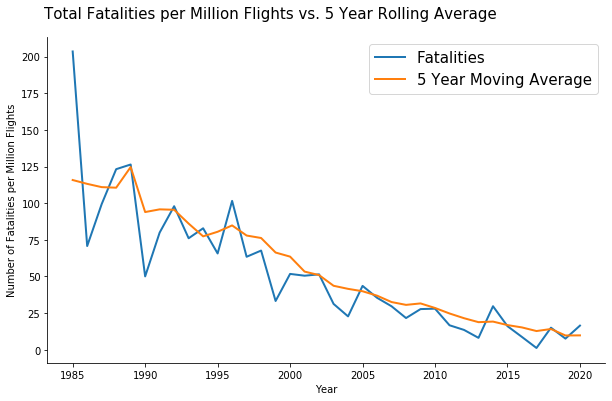

In [85]:
fig, ax = plt.subplots(figsize = (10,6))
fig.suptitle('Total Fatalities per Million Flights vs. 5 Year Rolling Average',
             x=0.12, y=.95, horizontalalignment='left', verticalalignment='top', fontsize=15)
df = accidents[accidents['Year']>1984]

plot1 = sns.lineplot(data=df, x="Year", y='fatalities \nper mln flights', linewidth=2, label = 'Fatalities')
plot2 = sns.lineplot(data=df, x="Year", y='5-year \nmoving avg fatalities', linewidth=2, label = '5 Year Moving Average')

ax.set_xlabel("Year")
ax.set_ylabel("Number of Fatalities per Million Flights")
sns.despine()
plt.legend(prop={'size':15}, loc='upper right')
#fig.legend(handles, labels, loc=(0.63,0.8))
plt.show()


In [86]:
accidents.to_csv('Airlines/global_accidents.csv') 

In [87]:
country_accidents = pd.read_csv('ArchiveData/CSV/Accidents and fatalities by Country.csv', encoding='latin-1')
country_accidents['Date'] = country_accidents['Date'].astype('datetime64[ns]')
country_accidents['Year'] = country_accidents['Date'].dt.year
country_accidents.head()

,Date,Type,Operator,Fatalities,Flight type,Phase,Location,Country,Year
0,2020-01-08,Boeing 737-800,Ukraine Int. Airlines,176,Passenger,En Route,near Tehran,Iran,2020
1,2020-02-05,Boeing 737-800,Pegasus Airlines,3,Passenger,Landing,Istanbul,Turkey,2020
2,2020-03-17,Cessna 208B Super Cargomaster,Planemasters,1,Cargo,En Route,"NW of La Crosse, KS",USA,2020
3,2020-05-04,Embraer EMB-120RT Brasilia,African Express Airways,6,Cargo,Approach,near Bardale Airstrip,Somalia,2020
4,2020-05-22,Airbus A320-214,PIA,97,Passenger,Approach,Karachi,Pakistan,2020


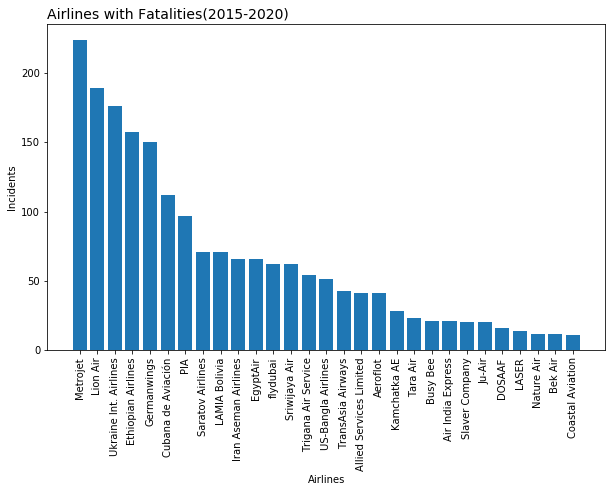

In [88]:
plt.rcParams['figure.figsize'] = [10,6]
df = country_accidents[country_accidents['Fatalities']>10].sort_values('Fatalities', ascending=False)
ax = plt.bar(df['Operator'],df['Fatalities'])

plt.title("Airlines with Fatalities(2015-2020)",fontsize = 14, loc='left')
plt.xlabel("Airlines")
plt.ylabel("Incidents")
plt.xticks(rotation=90, ha='center')

plt.show()

In [89]:
country_accidents.to_csv('Airlines/country_accidents.csv') 

#### Air Passenger Carried and Departures Data from https://data.worldbank.org/indicator/IS.AIR.PSGR

In [91]:
AirPassenger = pd.read_csv('ArchiveData/CSV/Transformed_AirPassenger.csv')
AirPassenger.head()

,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1970,NaN,3418300.0,84700.0,1167000.0,NaN,NaN,NaN,4209300.0,NaN,...,NaN,1525600.0,NaN,310441392.0,NaN,NaN,25900.0,1519000.0,187800.0,267400.0
1,1971,NaN,3775300.0,97400.0,1238100.0,NaN,NaN,NaN,4737000.0,NaN,...,NaN,1051300.0,NaN,331604904.0,NaN,NaN,54500.0,1659500.0,214200.0,291300.0
2,1972,NaN,4074500.0,104900.0,1285700.0,NaN,NaN,NaN,5625600.0,NaN,...,NaN,854400.0,NaN,NaN,NaN,NaN,57000.0,1868100.0,230100.0,315000.0
3,1973,NaN,4808000.0,96600.0,1453300.0,NaN,NaN,NaN,6569400.0,NaN,...,NaN,664700.0,NaN,401571800.0,NaN,NaN,61500.0,2313800.0,230600.0,340000.0
4,1974,NaN,5126100.0,96100.0,1685700.0,NaN,NaN,NaN,8227100.0,127500.0,...,NaN,552600.0,NaN,421145200.0,NaN,NaN,66500.0,2763600.0,240600.0,NaN


In [92]:
AirDeparture = pd.read_csv('ArchiveData/CSV/Transformed_AirDeparture.csv')
AirDeparture.head()

,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1970,NaN,152300.0,4000.0,67700.0,NaN,NaN,NaN,145300.0,NaN,...,NaN,39600.0,NaN,9448300.0,NaN,NaN,2200.0,39800.0,9300.0,10400.0
1,1971,NaN,160400.0,4700.0,67600.0,NaN,NaN,NaN,151200.0,NaN,...,NaN,24100.0,NaN,9504500.0,NaN,NaN,2800.0,46000.0,10600.0,10800.0
2,1972,NaN,157100.0,4800.0,67600.0,NaN,NaN,NaN,159800.0,NaN,...,NaN,20300.0,NaN,NaN,NaN,NaN,2900.0,47600.0,10800.0,10800.0
3,1973,NaN,155800.0,3700.0,72400.0,NaN,NaN,NaN,173400.0,NaN,...,NaN,18200.0,NaN,9764900.0,NaN,NaN,3000.0,47800.0,10000.0,11400.0
4,1974,NaN,150400.0,4300.0,69700.0,NaN,NaN,NaN,201400.0,4700.0,...,NaN,16000.0,NaN,9254900.0,NaN,NaN,3100.0,55700.0,10000.0,NaN


In [95]:
df1 = AirPassenger[['Year','United States']]
df1.rename(columns={"United States": "US_Passengers_Carried"}, inplace=True)

df2 = AirDeparture[['Year','United States']]
df2.rename(columns={"United States": "US_Air_Departures"}, inplace=True)
df2['US_Air_Departures_in_millions'] = df2['US_Air_Departures'].apply(lambda x: x/10e5)

C:\Users\bibek\anaconda3\envs\dsc650\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
Air_growth = pd.merge(df1, df2, how="left", on=["Year"])

In [97]:
Air_growth['Passenger_carried_per_million_flights'] = Air_growth['US_Passengers_Carried']//Air_growth['US_Air_Departures_in_millions']


No handles with labels found to put in legend.


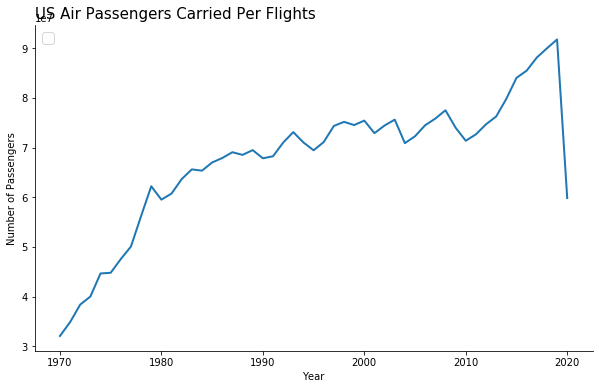

In [98]:
fig, ax = plt.subplots(figsize = (10,6))
df = Air_growth[Air_growth['Year']<2021]
ax = sns.lineplot(data=df, x="Year", y='Passenger_carried_per_million_flights', linewidth=2)

ax.set_title("US Air Passengers Carried Per Flights",fontsize = 15, loc='left')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Passengers")
sns.despine()
plt.legend(prop={'size':15}, loc='upper left')
plt.show()

In [59]:
Air_growth.to_csv('Airlines/passenegr_growth.csv') 

#### Airline Revenue Data from https://www.transtats.bts.gov/Data_Elements.aspx?Data=1

In [244]:
US_ASM = pd.read_csv('ArchiveData/CSV/AverageSeat_per_Miles.csv', encoding='latin-1')
US_ASM.rename(columns={"DOMESTIC": "Domestic_Avg_Seat_per_Miles" , 
                       "INTERNATIONAL": "International_Avg_Seat_per_Miles", 
                       "TOTAL": "Total_Avg_Seat_per_Miles"}, inplace=True)
US_ASM.drop("Month", axis=1, inplace=True)

In [245]:
US_Flights = pd.read_csv('ArchiveData/CSV/Number of US Flights.csv', encoding='latin-1')
US_Flights.rename(columns={"DOMESTIC": "Domestic_flights" , 
                       "INTERNATIONAL": "International_flights", 
                       "TOTAL": "Total_flights"}, inplace=True)
US_Flights.drop("Month", axis=1, inplace=True)

In [246]:
OP_Rev = pd.read_csv('ArchiveData/CSV/Operating_Rev_Airlines.csv', encoding='latin-1')
OP_Rev.rename(columns={"DOMESTIC": "Domestic_OP_Rev" , 
                       "INTERNATIONAL": "International_OP_Rev", 
                       "LATIN AMERICA" : "Latin_Amer_OP_Rev", 
                       "ATLANTIC": "Atlantic_OP_Rev",
                       "PACIFIC": "Pacific_OP_Rev",
                       "TOTAL": "Total_OP_Rev"}, inplace=True)
OP_Rev.drop("Quarter", axis=1, inplace=True)

In [247]:
Rev_per_miles = pd.read_csv('ArchiveData/CSV/Revenue_per_miles.csv', encoding='latin-1')
Rev_per_miles.rename(columns={"DOMESTIC": "Domestic_Rev_per_miles" , 
                              "INTERNATIONAL": "International_Rev_per_miles", 
                              "TOTAL": "Total_Rev_per_miles"}, inplace=True)
Rev_per_miles.drop("Month", axis=1, inplace=True)

In [248]:
passengers = pd.read_csv('ArchiveData/CSV/passengers.csv', encoding='latin-1')
passengers.rename(columns={"DOMESTIC": "Domestic_passengers" , 
                              "INTERNATIONAL": "International_passenegers", 
                              "TOTAL": "Total_passengers"}, inplace=True)
passengers.drop("Month", axis=1, inplace=True)

In [249]:
a = pd.merge(US_ASM, US_Flights, how="left", on=["Year"])
b = pd.merge(a, OP_Rev, how="left", on=["Year"])
c = pd.merge(b, Rev_per_miles, how="left", on=["Year"])
d = pd.merge(c, passengers, how="left", on=["Year"])
d.head()

,Year,Domestic_Avg_Seat_per_Miles,International_Avg_Seat_per_Miles,Total_Avg_Seat_per_Miles,Domestic_flights,International_flights,Total_flights,Domestic_OP_Rev,Latin_Amer_OP_Rev,Atlantic_OP_Rev,Pacific_OP_Rev,International_OP_Rev,Total_OP_Rev,Domestic_Rev_per_miles,International_Rev_per_miles,Total_Rev_per_miles,Domestic_passengers,International_passenegers,Total_passengers
0,2002,"667,378,835","216,349,806",883728641.0,8079007,596938,8675945,79287478,6085118,11074476,9244957,1432599,107124627,469964132,164417076,634381208,551899643.0,60878039.0,612777682.0
1,2003,"677,272,280","207,471,128",884743408.0,9453415,682748,10136163,88870096,6401207,11727142,8976179,1793391,117768014,492733117,157220620,649953737,583293762.0,60941211.0,644234973.0
2,2004,"728,302,880","233,791,511",962094391.0,9962389,737274,10699663,100902510,7364215,13634690,10768617,1990252,134660284,542816834,183355139,726171973,629768486.0,70462241.0,700230727.0
3,2005,"737,054,606","255,956,234",993010840.0,10033140,792741,10825881,111858063,8619055,15564572,12617779,2884934,151544403,569235644,201783004,771018648,657261487.0,77843181.0,735104668.0
4,2006,"725,684,907","271,026,279",996711186.0,9707992,813450,10521442,120906925,10300881,17752080,13684515,2887401,165531803,574519244,215169442,789688686,658362617.0,82735582.0,741098199.0


In [250]:
industry_stats = d[['Year', 'Total_Avg_Seat_per_Miles', 'Total_flights', 'Total_OP_Rev', 'Total_Rev_per_miles', 'Total_passengers']]

In [251]:
# Checking data type
def Datatype(df):
    # shape and data types of the data
    print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print(df.dtypes)

    # select numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)

    # select non numeric columns
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    non_numeric_cols = df_non_numeric.columns.values
    print(non_numeric_cols)

In [252]:
Datatype(industry_stats)

There are 20 rows and 6 columns
Year                          int64
Total_Avg_Seat_per_Miles    float64
Total_flights                 int64
Total_OP_Rev                  int64
Total_Rev_per_miles           int64
Total_passengers            float64
dtype: object
['Year' 'Total_Avg_Seat_per_Miles' 'Total_flights' 'Total_OP_Rev'
 'Total_Rev_per_miles' 'Total_passengers']
[]


In [253]:
industry_stats.to_csv('Airlines/industry_stats.csv') 

#### All Revenue Indicators: http://web.mit.edu/airlinedata/www/Traffic&Capacity.html

In [99]:
System_Revenue = pd.read_csv('ArchiveData/CSV/System Revenue.csv')
System_Revenue.head()

,Year,Total Operating Revenue by Sector_Billions,System Passenger Revenue_Billions,Total_System_ASM_Millions,Total_System_RPM_Millions,Total_Enplaned_Passengers_Thousands,Passenger Revenue Per ASM_cents_per_ASM,Passenger Yield_Cents_per_RPM
0,1995,69.93,61.68,720954,486535,470880,8.56,12.68
1,1996,74.74,66.63,741888,519374,498124,8.98,12.83
2,1997,80.13,70.92,772940,548424,512007,9.18,12.93
3,1998,81.85,72.18,793053,563980,525355,9.10,12.80
4,1999,85.46,74.90,834904,594551,542918,8.97,12.60


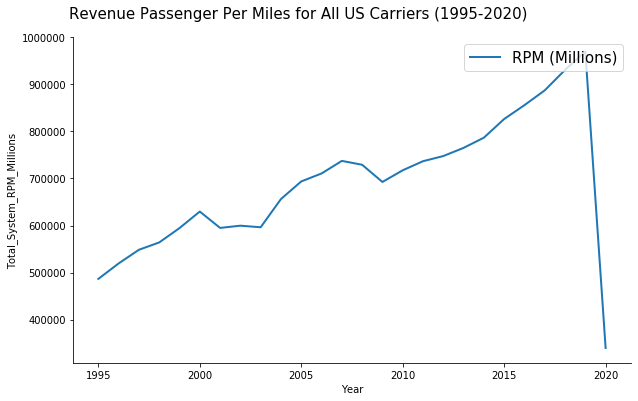

In [260]:
fig, ax = plt.subplots(figsize = (10,6))
fig.suptitle('Revenue Passenger Per Miles for All US Carriers (1995-2020)',
             x=0.12, y=.95, horizontalalignment='left', verticalalignment='top', fontsize=15)

plot1 = sns.lineplot(data=System_Revenue, x="Year", y='Total_System_RPM_Millions', linewidth=2, label = 'RPM (Millions)')

sns.despine()
plt.legend(prop={'size':15}, loc='upper right')
#fig.legend(handles, labels, loc=(0.63,0.8))
plt.show()

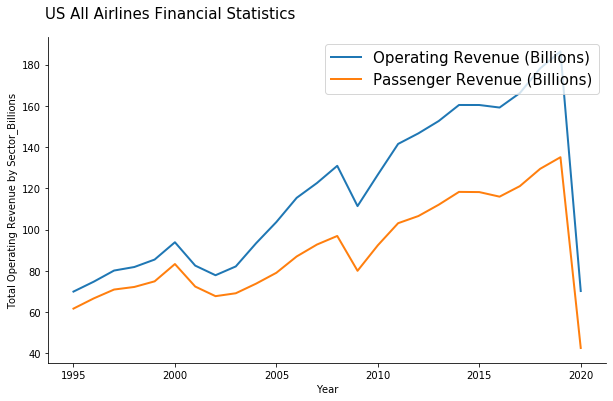

In [261]:
fig, ax = plt.subplots(figsize = (10,6))
fig.suptitle('US All Airlines Financial Statistics',
             x=0.12, y=.95, horizontalalignment='left', verticalalignment='top', fontsize=15)

plot1 = sns.lineplot(data=System_Revenue, x="Year", y='Total Operating Revenue by Sector_Billions', 
                     linewidth=2, label = 'Operating Revenue (Billions)')
plot2 = sns.lineplot(data=System_Revenue, x="Year", y='System Passenger Revenue_Billions', 
                     linewidth=2, label = 'Passenger Revenue (Billions)')

sns.despine()
plt.legend(prop={'size':15}, loc='upper right')
#fig.legend(handles, labels, loc=(0.63,0.8))
plt.show()

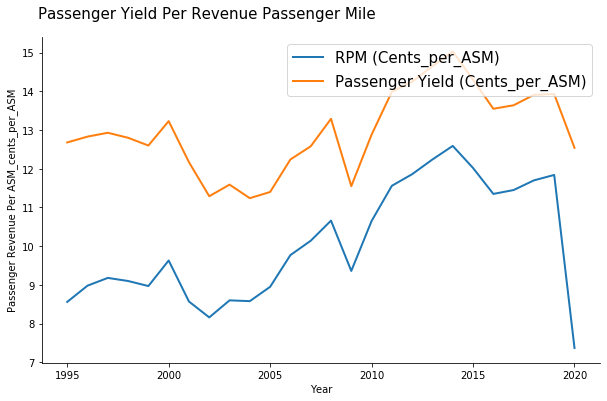

In [263]:
fig, ax = plt.subplots(figsize = (10,6))
fig.suptitle('Passenger Yield Per Revenue Passenger Mile',
             x=0.12, y=.95, horizontalalignment='left', verticalalignment='top', fontsize=15)

plot1 = sns.lineplot(data=System_Revenue, x="Year", y='Passenger Revenue Per ASM_cents_per_ASM', 
                     linewidth=2, label = 'RPM (Cents_per_ASM)')
plot2 = sns.lineplot(data=System_Revenue, x="Year", y='Passenger Yield_Cents_per_RPM', 
                     linewidth=2, label = 'Passenger Yield (Cents_per_ASM)')

sns.despine()
plt.legend(prop={'size':15}, loc='upper right')
#fig.legend(handles, labels, loc=(0.63,0.8))
plt.show()

In [264]:
System_Revenue.to_csv('Airlines/System_Revenueindustry_stats.csv') 

#### USA Flight Accidents

In [267]:
USA_Accidents = pd.read_excel('ArchiveData/CSV/USA_Accidents.xlsx', sheet_name='USA_Accidents')
USA_Accidents.head()

,Year,All Accidents,Fatal Accidents,Total Fatalities,Aboard Fatalities,Flight Hours,Flight Miles,Departures,"All Accidents\nper 100,000\nFlight Hours","Fatal Accidents\nper 100,000\nFlight Hours","All Accidents\nper 1,000,000\nFlight Miles","Fatal Accidents\nper 1,000,000\nFlight Miles","All Accidents\nper 100,000\nDepartures","Fatal Accidents\nper 100,000\nDepartures"
0,2001,46,6,531,525,17814191,7294191000,10954832,0.235767,0.011227,0.005758,0.000274,0.383392,0.018257
1,2002,41,0,0,0,17290198,7192501000,10508473,0.237129,0.000000,0.005700,0.000000,0.390161,0.000000
2,2003,54,2,22,21,17467700,7280383000,10433164,0.309142,0.011450,0.007417,0.000275,0.517580,0.019170
3,2004,30,2,14,14,18882503,7930159000,11023128,0.158877,0.010592,0.003783,0.000252,0.272155,0.018144
4,2005,40,3,22,20,19390029,8165643000,11130407,0.206292,0.015472,0.004899,0.000367,0.359376,0.026953


In [268]:
Passenger_enplanements = pd.read_excel('ArchiveData/CSV/USA_Accidents.xlsx', sheet_name='Passenger_Enplanements')
Passenger_enplanements.head()

,Year,Fatalities,Serious\nInjuries,Passenger Enplanements\n(millions),Million Passenger Enplanements per\nPassenger Fatality
0,2001,483,7,629.0,2.505976
1,2002,0,11,619.0,0.000000
2,2003,19,10,654.0,34.421053
3,2004,11,3,711.0,64.636364
4,2005,18,2,743.0,41.277778


In [269]:
USA_accidents = pd.merge(USA_Accidents, Passenger_enplanements, how="left", on=["Year"])
USA_accidents.head()

,Year,All Accidents,Fatal Accidents,Total Fatalities,Aboard Fatalities,Flight Hours,Flight Miles,Departures,"All Accidents\nper 100,000\nFlight Hours","Fatal Accidents\nper 100,000\nFlight Hours","All Accidents\nper 1,000,000\nFlight Miles","Fatal Accidents\nper 1,000,000\nFlight Miles","All Accidents\nper 100,000\nDepartures","Fatal Accidents\nper 100,000\nDepartures",Fatalities,Serious\nInjuries,Passenger Enplanements\n(millions),Million Passenger Enplanements per\nPassenger Fatality
0,2001,46,6,531,525,17814191,7294191000,10954832,0.235767,0.011227,0.005758,0.000274,0.383392,0.018257,483,7,629.0,2.505976
1,2002,41,0,0,0,17290198,7192501000,10508473,0.237129,0.000000,0.005700,0.000000,0.390161,0.000000,0,11,619.0,0.000000
2,2003,54,2,22,21,17467700,7280383000,10433164,0.309142,0.011450,0.007417,0.000275,0.517580,0.019170,19,10,654.0,34.421053
3,2004,30,2,14,14,18882503,7930159000,11023128,0.158877,0.010592,0.003783,0.000252,0.272155,0.018144,11,3,711.0,64.636364
4,2005,40,3,22,20,19390029,8165643000,11130407,0.206292,0.015472,0.004899,0.000367,0.359376,0.026953,18,2,743.0,41.277778


In [270]:
USA_accidents.to_csv('Airlines/USA_accidents.csv') 

In [271]:
USA_stats = pd.merge(USA_accidents, System_Revenue, how="left", on=["Year"])

In [272]:
USA_stats.to_csv('Airlines/USA_stats.csv') 

#### All Crash Data: 

Other Modes Crash: https://www.bts.gov/content/transit-safety-data-modea-all-reported-accidentsb  

Motor Vehicle: https://www.bts.gov/content/motor-vehicle-safety-data  

Aircarrier Crash: https://www.bts.gov/content/us-air-carrier-safety-data

In [292]:
all_crashes = pd.read_csv('Airlines/all_Crash_statistics.csv')
all_crashes.head()

,Year,Aircraft_Accidents,Aircraft_Fatalities,Aircraft_Miles_millions,Motor_Vehicle_Accidents,Motor_Vehicle_Fatalities,Motor_Vehicle_Miles_millions,Motor_bus_Accidents,Light_rail_Accidents,Heavy_rail_Accidents,...,Motor_bus_Fatalities,Light_rail_Fatalities,Heavy_rail_Fatalities,Commuter_rail_Fatalities,Van_pool_Fatalities,Motor_bus_Miles_millions,Light_rail_Miles_millions,Heavy_rail_Miles_millions,Commuter_rail_Miles_millions,Van_pool_Miles_millions
0,1990,24,39,4948,6471000,44599,2144362,55289,699,144,...,92,5,51,63,0,1668,24,529,187,8
1,1991,26,50,4825,6117000,41508,2172050,44467,671,188,...,80,11,59,63,0,1661,27,522,188,8
2,1992,18,33,5039,6000000,39250,2247151,34282,600,613,...,91,6,33,43,0,1688,28,520,188,13
3,1993,23,1,5249,6106000,40150,2296378,28596,449,662,...,79,14,37,59,0,1690,27,518,206,16
4,1994,23,239,5478,6496000,40716,2357588,27754,512,744,...,90,10,41,82,0,1702,34,522,210,18
